In [1]:
from graph_based_sampling import *
import time

graphs = [load_graph_env(i) for i in range(1, 5)]

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from evaluation_based_sampling import *

%matplotlib inline

def plot_hist(vals, weights, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.hist(vals, bins=50, weights=weights)
    plt.show()
    
def plot_2_hists(vals, weights):
    plt.subplot(1, 2, 1)
    plt.hist(vals[:, 0], bins=50, weights=weights)
    plt.subplot(1, 2, 2)
    plt.hist(vals[:, 1], bins=50, weights=weights)
    plt.tight_layout()
    plt.show()


In [4]:
n_samples = int(1e4)
start_time = time.time()
samples = torch.stack(hmc_sampling(graphs[0], samples=n_samples))
print("--- %s seconds ---" % (time.time() - start_time))
mean = samples.mean()
var = samples.std()
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Var:', var)

--- 39.23874378204346 seconds ---
Number of samples: 10000
Mean: tensor(8.5149, dtype=torch.float64, grad_fn=<MeanBackward0>)
Var: tensor(1.0056, dtype=torch.float64, grad_fn=<StdBackward0>)


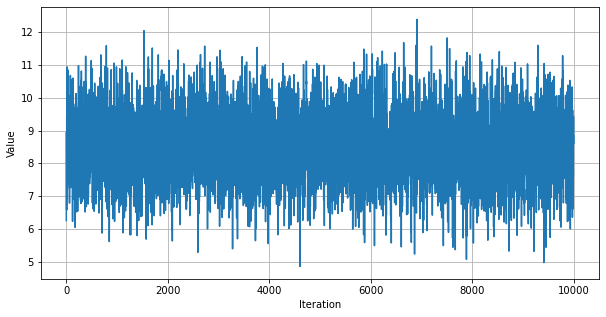

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(samples)), samples.detach().numpy())
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.grid()

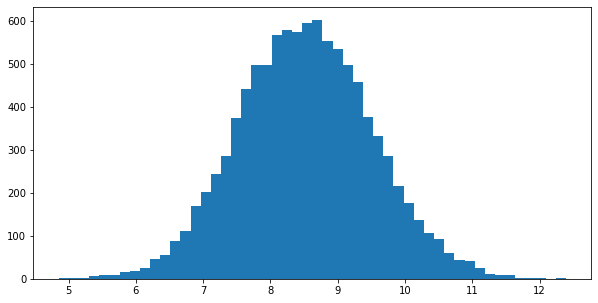

In [18]:
plot_hist(samples.detach().numpy(), None)

In [20]:
n_samples = int(1e4)
start_time = time.time()
samples = torch.stack(hmc_sampling(graphs[1], samples=n_samples))
print("--- %s seconds ---" % (time.time() - start_time))
mean = samples.mean(dim=0)
cov = np.cov(samples.detach().numpy(), rowvar=False)
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Cov:', cov)

--- 116.26391291618347 seconds ---
Number of samples: 10000
Mean: tensor([ 2.1552, -0.5288], grad_fn=<MeanBackward1>)
Cov: [[ 0.08024972 -0.19269768]
 [-0.19269768  0.86130379]]


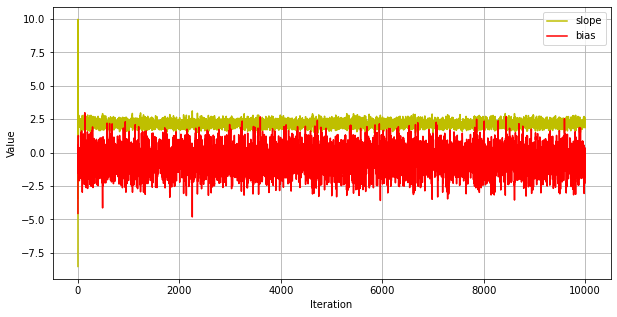

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(samples)), samples.detach().numpy()[:, 0], color='y', label='slope')
plt.plot(range(len(samples)), samples.detach().numpy()[:, 1], color='r', label='bias')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid()

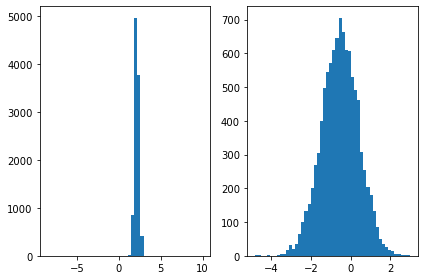

In [22]:
plot_2_hists(samples.detach().numpy(), None)